In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
df = pd.read_excel("Data/DatosMadrid.xlsx")

In [3]:
df.columns

Index(['Municipio', 'Distrito', 'Barrios', 'Población', '0-15 años',
       '16-64 años', '65 o más años', 'Edad  promedio', 'Densidad',
       'Superficie', 'Índice de la estructura de  la población activa',
       'Tasa de desempleo', 'Nacimientos', 'Defunciones', 'Inmigración',
       'Emigración', 'Renta neta media anual de los hogares\n',
       'Actividades economicas', 'Educacion', 'Centros Universitarios',
       'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Latidud', 'Longitud', 'Distancia al centro (km)',
       'Metro', 'Tren', 'Autobus', 'Calidad del aire', 'PM2,5', 'PM10', 'NO2',
       'O3', 'SO2', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(pre

In [4]:
df

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Seguridad Percibida de Noche,Delitos intervencion policial,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n
0,Madrid,Centro,NaN,140991,10919,107548,22006,43.89,261.823804,5.228,...,69.8,1936,309,4830.0,-0.200,-1.000,-5.100,5096.0,77.3,73.6
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,69.8,325,52,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,69.8,648,104,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,69.8,148,24,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6
4,Madrid,Centro,Justicia,18092,1419,13775,2827,44.09,243.827493,0.742,...,69.8,248,40,5707.0,0.012,-1.700,-1.700,6120.0,77.3,73.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Madrid,Barajas,Alameda de Osuna,19820,3302,11403,5115,45.16,101.070882,1.961,...,67.6,38,14,3421.0,0.013,-0.600,0.031,3442.0,79.0,80.9
148,Madrid,Barajas,Aeropuerto,1900,278,1335,287,42.00,0.756008,25.132,...,67.6,4,1,2622.0,-3.700,-9.000,-13.500,3203.0,79.0,80.9
149,Madrid,Barajas,Casco Histórico de Barajas,7683,906,5351,1426,44.25,126.157635,0.609,...,67.6,16,4,2622.0,-3.700,-9.000,-13.500,3203.0,79.0,80.9
150,Madrid,Barajas,Timón,12853,2676,8821,1356,38.09,13.395518,9.595,...,67.6,27,7,3051.0,0.023,0.001,0.021,3251.0,79.0,80.9


### Distribucion de la poblacion por edad en los distritos de Madrid


/var/folders/98/22466_5x62dglhtrldfhg_6m0000gq/T/ipykernel_12755/3600803704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('Distrito').sum()


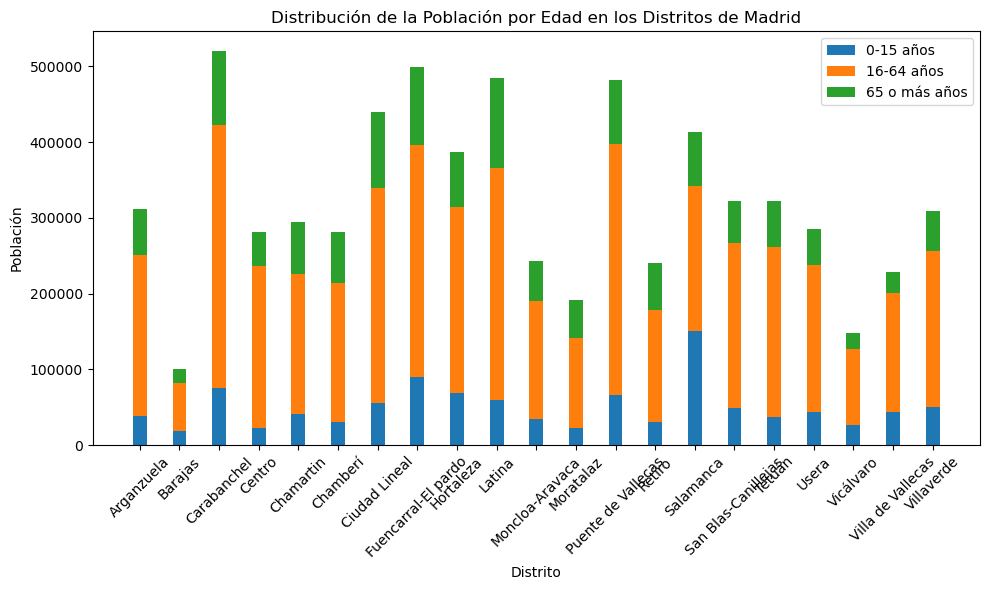

<Figure size 640x480 with 0 Axes>

In [8]:
# Agrupar el DataFrame por 'Distrito' y sumar los valores
df_grouped = df.groupby('Distrito').sum()

# Obtener los nombres de los municipios
distritos = df_grouped.index

# Obtener los valores de las edades
edad_0_15 = df_grouped['0-15 años']
edad_16_64 = df_grouped['16-64 años']
edad_65_mas = df_grouped['65 o más años']

# Definir la posición de las barras
bar_width = 0.35
bar_positions = np.arange(len(distritos))

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(bar_positions, edad_0_15, width=bar_width, label='0-15 años')
plt.bar(bar_positions, edad_16_64, width=bar_width, bottom=edad_0_15, label='16-64 años')
plt.bar(bar_positions, edad_65_mas, width=bar_width, bottom=edad_0_15 + edad_16_64, label='65 o más años')

# Añadir etiquetas y título
plt.xlabel('Distrito')
plt.ylabel('Población')
plt.title('Distribución de la Población por Edad en los Distritos de Madrid')

# Añadir nombres de los distritos a las posiciones de las barras y rotarlos para mejor visualización
plt.xticks(bar_positions, distritos, rotation=45)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros para que la figura encaje en la caja
plt.show()
# Guardando la imagen en formato PNG para una mejor calidad
plt.savefig('DISTRIBUCION_DE_LA_POBLACIONPOREDAD.png', format='png', dpi=300, bbox_inches='tight')

### Relacione entre densidad y la Superficie de los distritos de Madrid

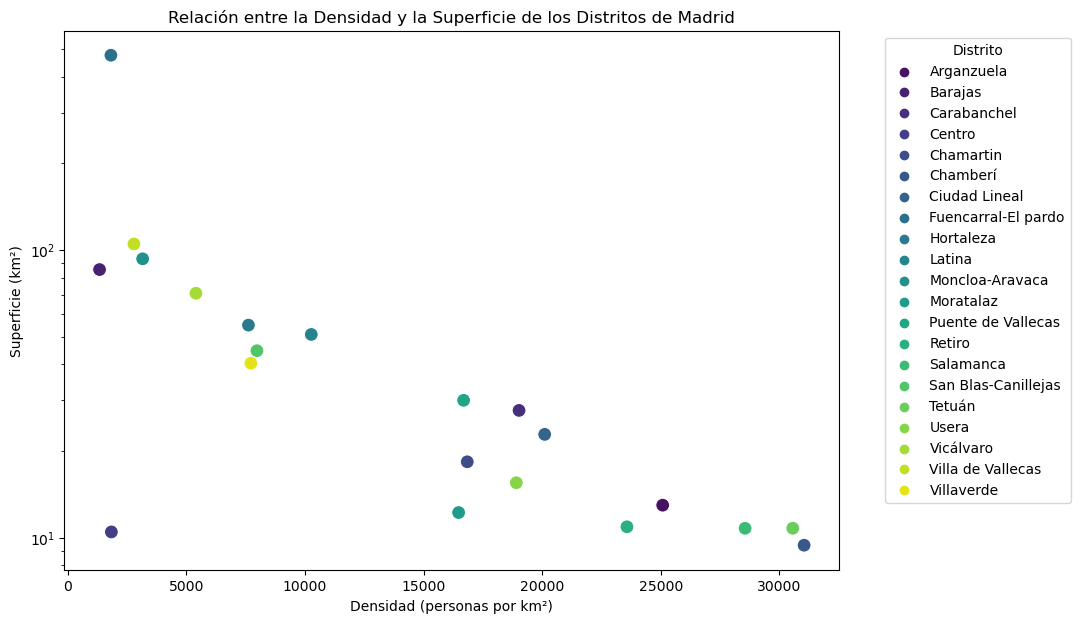

In [7]:
df_agrupado = df.groupby("Distrito").agg({"Superficie": "sum", "Densidad": "sum"}).reset_index()

# Creando la visualización con Matplotlib y Seaborn
plt.figure(figsize=(10, 7))  # Define el tamaño de la figura
scatter_plot = sns.scatterplot(
    x="Densidad",  # Eje X
    y="Superficie",  # Eje Y
    hue="Distrito",  # Colores para cada distrito
    data=df_agrupado,  # Fuente de datos
    palette="viridis",  # Paleta de colores
    s=100  # Tamaño de los puntos
)

# Mejorando la visualización
plt.title("Relación entre la Densidad y la Superficie de los Distritos de Madrid")  # Título del gráfico
plt.xlabel("Densidad (personas por km²)")  # Etiqueta del eje X
plt.ylabel("Superficie (km²)")  # Etiqueta del eje Y
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico

# Ajustes adicionales
scatter_plot.set(yscale="log") 

# Guardando la imagen en formato PNG para una mejor calidad
plt.savefig('Densidad_superficie_distrito1.png', format='png', dpi=300, bbox_inches='tight')

# Mostrando el gráfico
plt.show()

### Renta media Anual por distritos de Madrid

/var/folders/98/22466_5x62dglhtrldfhg_6m0000gq/T/ipykernel_12755/1391291335.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Distrito', y='Renta neta media anual de los hogares\n', data=df, ci="sd")


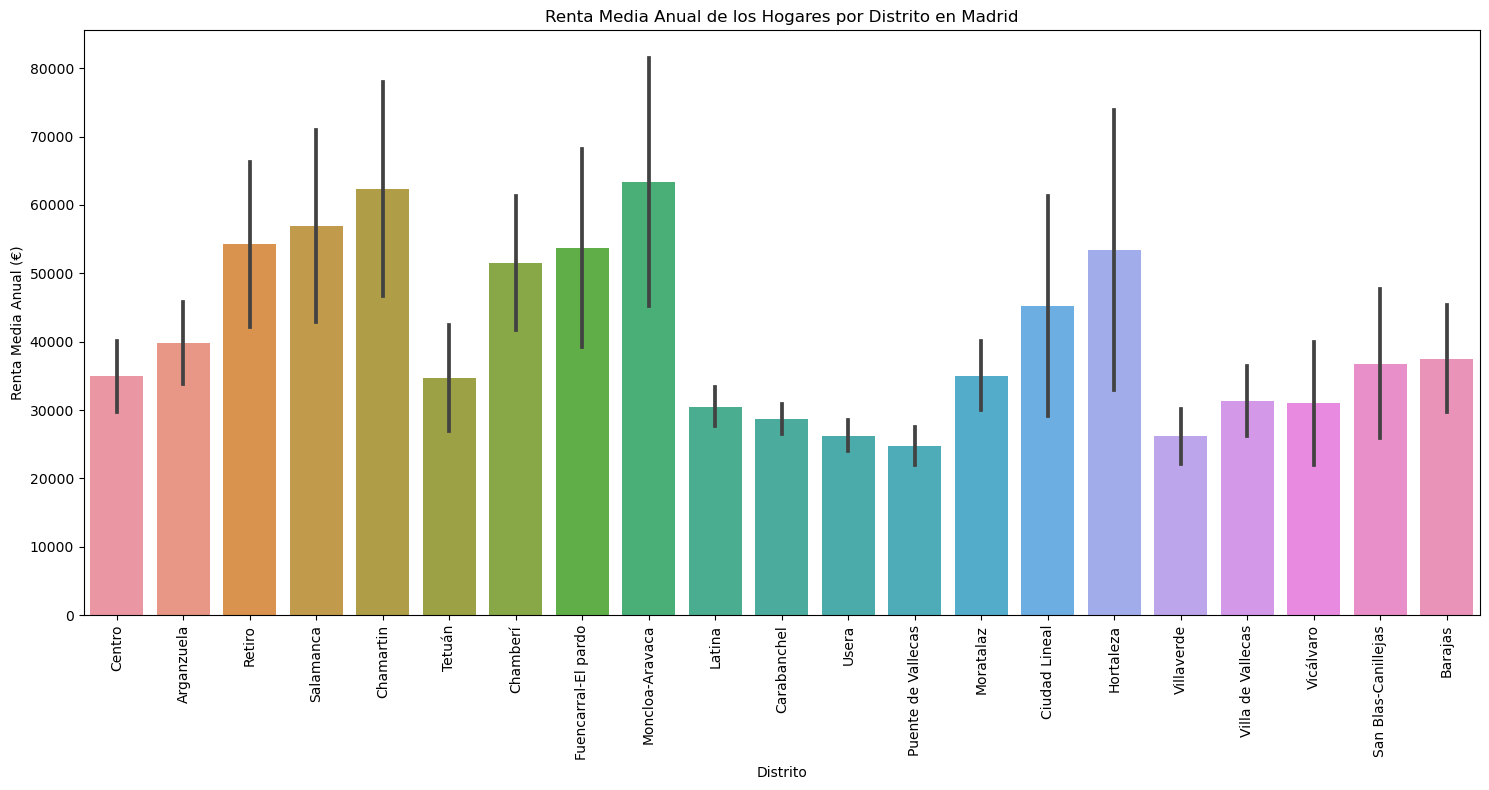

In [12]:
# Gráfico de barras para la renta media anual de los hogares por distrito
plt.figure(figsize=(15, 8))
sns.barplot(x='Distrito', y='Renta neta media anual de los hogares\n', data=df, ci="sd")
plt.title('Renta Media Anual de los Hogares por Distrito en Madrid')
plt.ylabel('Renta Media Anual (€)')
plt.xticks(rotation=90)
plt.tight_layout() # Ajusta el layout para evitar que las etiquetas se superpongan
plt.savefig('renta_media_anual_distritos.png') # Guardar la figura en un archivo
plt.show()



### Tasa de desempleo por distrito de Madrid

/var/folders/98/22466_5x62dglhtrldfhg_6m0000gq/T/ipykernel_12755/1239256777.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Distrito', y='Tasa de desempleo', data=df, ci="sd", color='salmon')


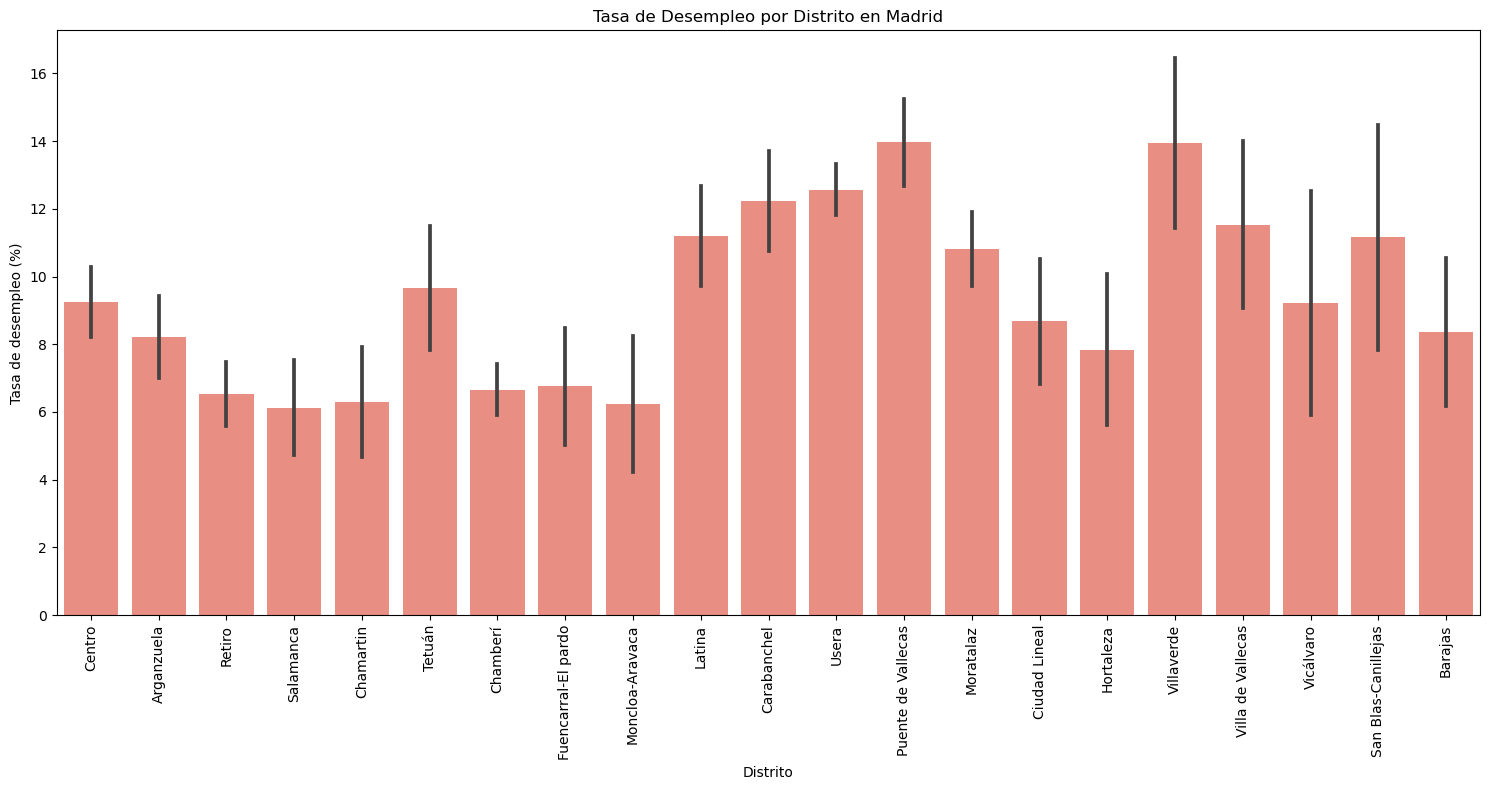

In [11]:
# Gráfico de barras para la tasa de desempleo por distrito
plt.figure(figsize=(15, 8))
sns.barplot(x='Distrito', y='Tasa de desempleo', data=df, ci="sd", color='salmon')
plt.title('Tasa de Desempleo por Distrito en Madrid')
plt.ylabel('Tasa de desempleo (%)')
plt.xticks(rotation=90)
plt.tight_layout() # Ajusta el layout para evitar que las etiquetas se superpongan
plt.savefig('tasa_desempleo_distritos.png') # Guardar la figura en un archivo
plt.show()

### Disponibilidad se servicios esenciales por distrito de Madrid

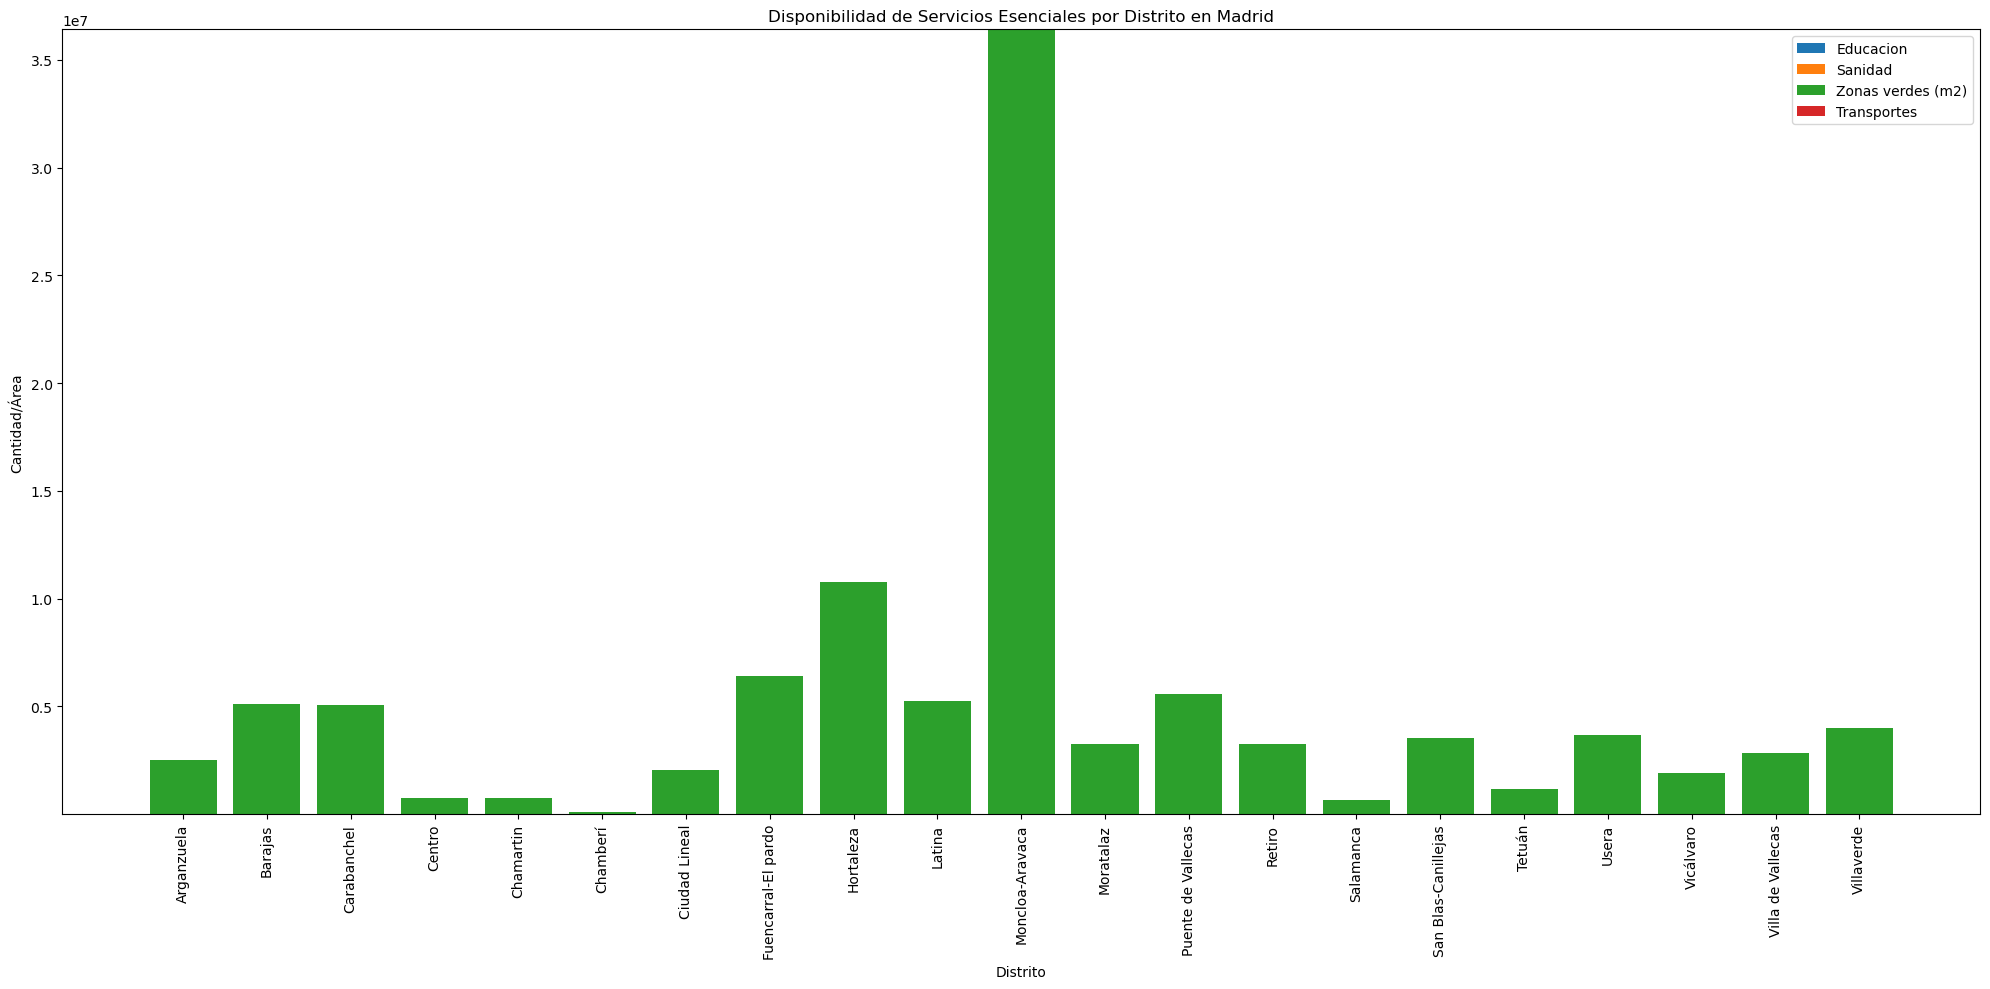

In [15]:
# Sumar las columnas de transporte para obtener un valor total de disponibilidad de transporte
df['Transportes'] = df['Metro'] + df['Tren'] + df['Autobus']

# Agrupar los datos por distrito y sumar los valores de interés
servicios_df = df.groupby('Distrito').agg({
    'Educacion': 'sum',
    'Sanidad': 'sum',
    'Zonas verdes (m2)': 'sum',
    'Transportes': 'sum'
}).reset_index()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(20, 10))
bottom = None
for column in ['Educacion', 'Sanidad', 'Zonas verdes (m2)', 'Transportes']:
    plt.bar(servicios_df['Distrito'], servicios_df[column], bottom=bottom, label=column)
    bottom = servicios_df[column] if bottom is None else bottom + servicios_df[column]

# Añadir detalles al gráfico
plt.xlabel('Distrito')
plt.ylabel('Cantidad/Área')
plt.title('Disponibilidad de Servicios Esenciales por Distrito en Madrid')
plt.legend()
plt.xticks(rotation=90)  

# Mostrar el gráfico
plt.tight_layout()  # Ajustar la disposición para que todo encaje en el gráfico
plt.show()

### Percepcion de seguridad 

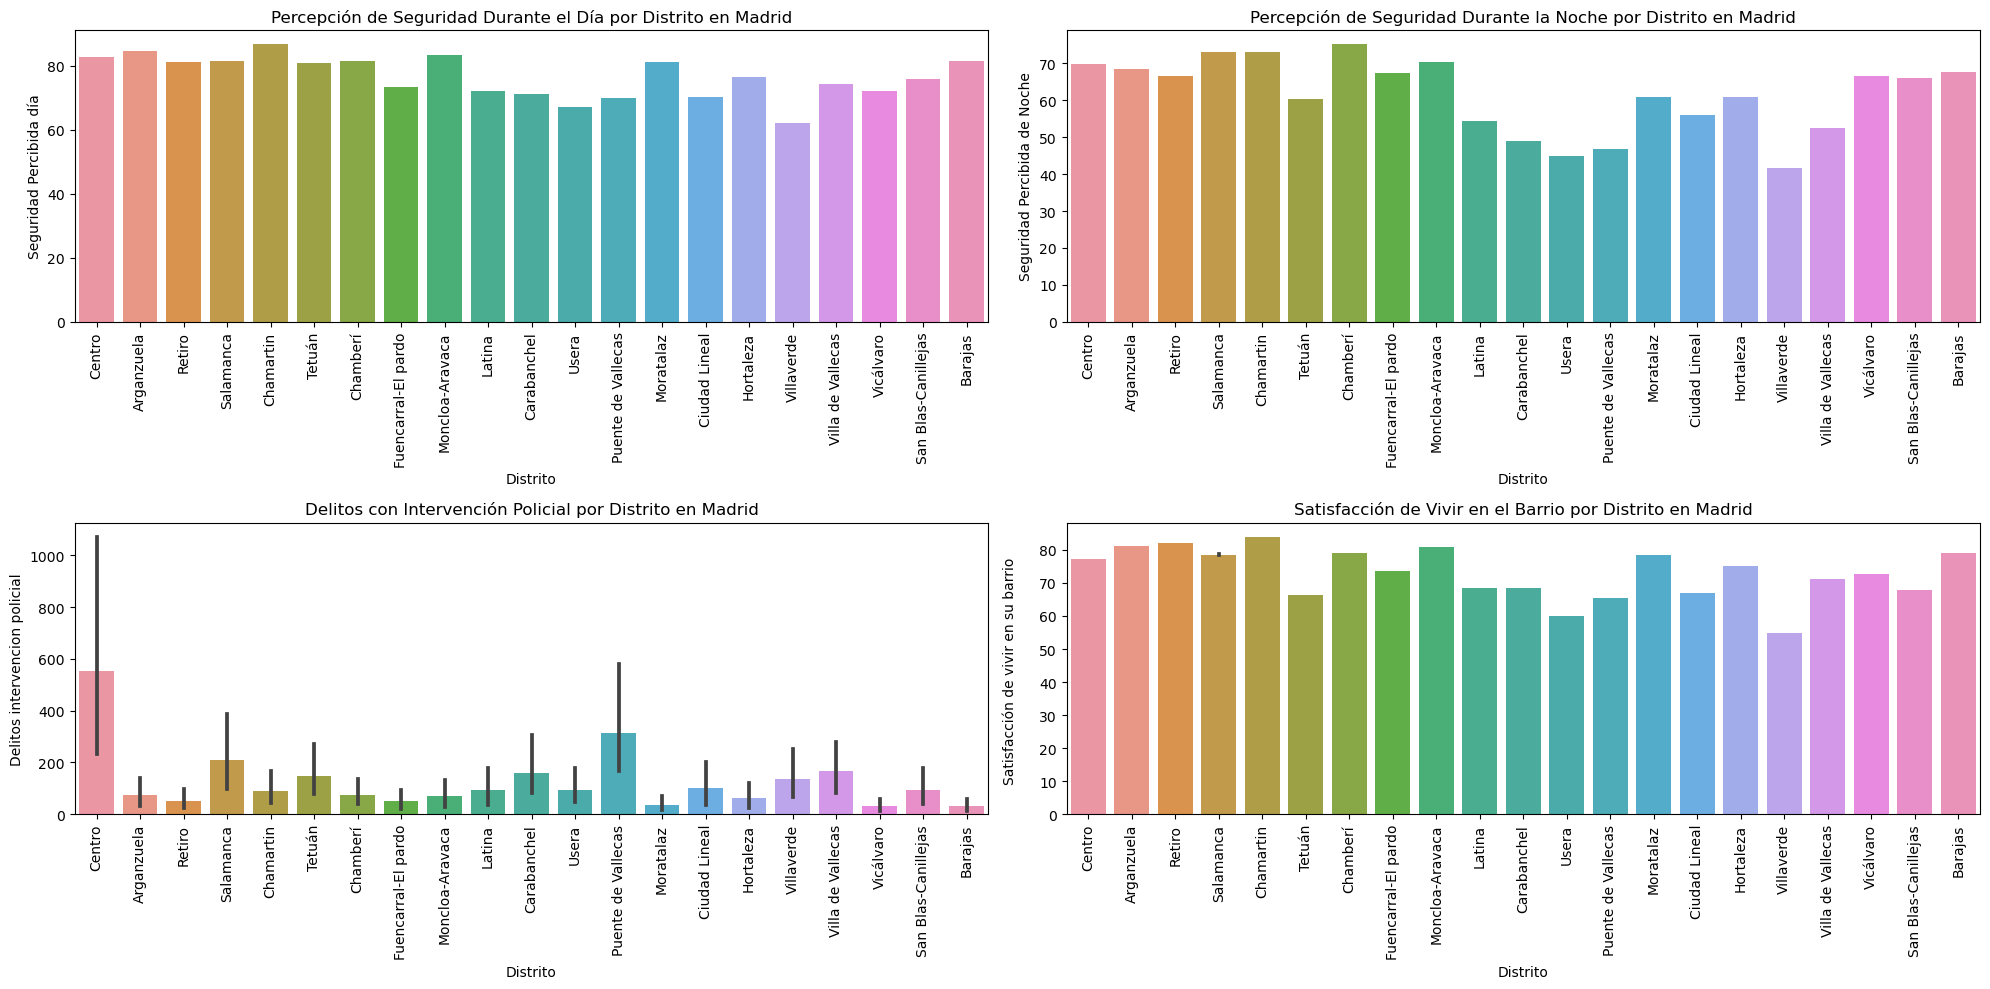

In [16]:
# Creamos gráficos de barra para visualizar la percepción de seguridad durante el día y la noche por distrito
plt.figure(figsize=(20, 10))

# Percepción de seguridad durante el día
plt.subplot(2, 2, 1)
sns.barplot(x='Distrito', y='Seguridad Percibida día', data=df)
plt.title('Percepción de Seguridad Durante el Día por Distrito en Madrid')
plt.xticks(rotation=90)

# Percepción de seguridad durante la noche
plt.subplot(2, 2, 2)
sns.barplot(x='Distrito', y='Seguridad Percibida de Noche', data=df)
plt.title('Percepción de Seguridad Durante la Noche por Distrito en Madrid')
plt.xticks(rotation=90)

# Delitos con intervención policial
plt.subplot(2, 2, 3)
sns.barplot(x='Distrito', y='Delitos intervencion policial', data=df)
plt.title('Delitos con Intervención Policial por Distrito en Madrid')
plt.xticks(rotation=90)

# Satisfacción de vivir en el barrio
plt.subplot(2, 2, 4)
sns.barplot(x='Distrito', y='Satisfacción de vivir en su barrio \n', data=df)
plt.title('Satisfacción de Vivir en el Barrio por Distrito en Madrid')
plt.xticks(rotation=90)

# Ajustamos el layout y mostramos el gráfico
plt.tight_layout()
plt.show()

### Distribucion de precios de viviendas

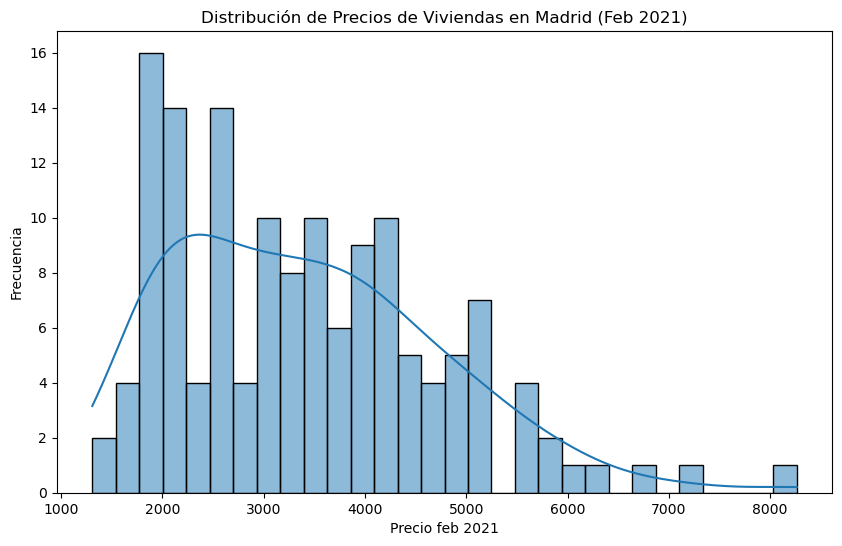

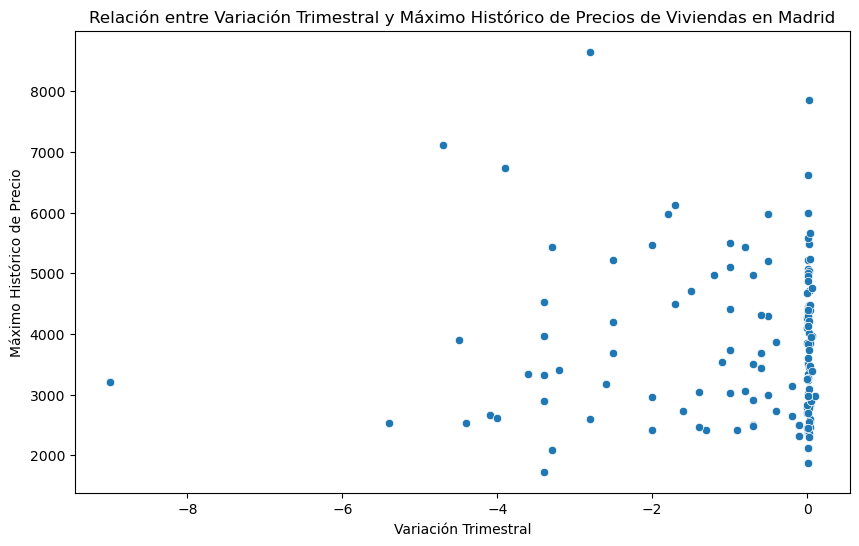

In [17]:
# Crear un histograma de los precios de febrero de 2021
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Precio feb 2021', bins=30, kde=True)
plt.xlabel('Precio feb 2021')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Viviendas en Madrid (Feb 2021)')
plt.show()



# Crear un gráfico de dispersión para ver la relación entre la variación trimestral y el máximo histórico de precios
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Variación trimestral', y='Máximo histórico(precio)')
plt.xlabel('Variación Trimestral')
plt.ylabel('Máximo Histórico de Precio')
plt.title('Relación entre Variación Trimestral y Máximo Histórico de Precios de Viviendas en Madrid')
plt.show()